# Intro to Machine Learning in Python

Learn how to get started training Neural Networks with keras, so you can explore more on your own. 
* I'm Not going to go into theory, but feel free to ask about it




# Warning 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Mauritius_Road_Signs_-_Warning_Sign_-_Other_dangers.svg/556px-Mauritius_Road_Signs_-_Warning_Sign_-_Other_dangers.svg.png" style="width:50px">

It's actually pretty easy to get started training Machine learning algorithms, but be aware there are plenty of examples of well trained, well coded, and well intentioned ML algorithms that do harmful things.


<a href="https://www.technologyreview.com/s/613274/facebook-algorithm-discriminates-ai-bias"> Facebook’s ad-serving algorithm discriminates by gender and race
 </a>
    
<a href="https://www.reuters.com/article/us-amazon-com-jobs-automation-insight/amazon-scraps-secret-ai-recruiting-tool-that-showed-bias-against-women-idUSKCN1MK08G"> Amazon scraps secret AI recruiting tool that showed bias against women
 </a>

<a href="https://www.thedailybeast.com/why-doctors-arent-afraid-of-better-more-efficient-ai-diagnosing-cancer"> Ruler in picture an indicator for Cancer </a>

<a href="https://www.theverge.com/2016/3/24/11297050/tay-microsoft-chatbot-racist"> Twitter taught Microsoft’s AI chatbot to be a racist asshole in less than a day </a>

Be aware and careful before you deploy.


<img src="https://s3.ap-south-1.amazonaws.com/techleer/207.jpg">

# Vocab
## Artificial Intelligence
    An all encompassing term for a broad field the most promising of which is currently machine learning
## Machine Learning
* Deep Learning - Deep Neural Networks of all forms
* ‘Traditional’ Machine Learning  - Pretty much everything else
    Trees, SVMs, Linear Regression, Naive Bayes...
* **X’s = Input variables**
* **Y’s = Target Variables**
* Loss function - Numerical Goal of the Model


# Machine Learning
* Find f(x) such that f(x) best approximates y
* Examples:
    * Given some pixels (x) tell me the probability it’s a cat (y)
    * Given news articles (x) tell me a stocks value (y)
    * Given some sequences x find some low dimensional space (z) that represent my data 
      * f1(x)=z f2(z)=x  
* **Important Note: No prediction of causality** 
* Function outputs and targets can be stochastic 


In [2]:
# Packages

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Machine learning algorithms all start form a series data examples


# Input Data
* **numpy arrays** 
* pandas dataframes
* hdf5, etc
* **shape = (examples x data dimentions)** 
    * RGB Image Dataset (Number of images x Height x Width x 3) *(3=RGB)
    * Text (Text blocks x ? ) examples with varying length can have an unspecified dimension size
        * When training each batch needs to be the same length
* Divide into 2 or 3 splits
  * 2 Training/Testing (one for training and one for checking for over-fitting)
  * 3 Training/Development/Testing 
      * One for training, one for checking for over-fitting (Development) )
      * One for testing performance, but not for making any modeling decisions
          * i.e. in this case testing is the data you want the model to actually work with  
          
# A short Menu of ML layers
* Convolutional Layers (Conv1D, Conv2D, Conv3D)
    * Input sequences of fixed or varying length best when array values that are close together are correlate i.e pictures
    * Output a new sequence normally lower dimension, but with more channels    
* Recurrent Neural Networks (RNN, LSTM, GRUS)
    * Input sequence
    * Output sequence or a fixed dimensional output    

* Embedding Network
    * A learnable mapping from a large set of integers, to a fixed output
    * Input integer
    * Ouput vector

* Dense Network
    * Fixed Input
    * Fixed Output

* Dropout
    * Good at preventing overfitting
          

In [4]:
# Lets start with a simple prediction a straight Line

X=np.random.uniform(0,10,size=(10000,50))
def func(X):
    return 2*X[:,0]+1 #Ignore all other input have the output only depend on the first dimention
Y=func(X)




    
    

In [27]:
# All models start out with an input layer

input_layer=tf.keras.layers.Input(shape=(50,)) 
output_layer = tf.keras.layers.Dense(1)(input_layer)
#A keras model is class used for fitting it takes input layers and output layers
model=tf.keras.models.Model(input_layer,output_layer)
model.compile(loss='mse',optimizer='adam')

# Fit Our Simple Neural Network
# Stop fitting when the validation loss stops improving
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
#Fit
model.fit(X,Y,epochs=100,validation_split=0.5,callbacks=[es]) #Have Keras make a test/validation split for us




Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================]5000/5000 [==============================] - 1s 142us/step - loss: 18.3964 - val_loss: 12.5862

Epoch 2/100
5000/5000 [==============================]5000/5000 [==============================] - 0s 65us/step - loss: 10.9635 - val_loss: 9.5946

Epoch 3/100
5000/5000 [==============================]5000/5000 [==============================] - 0s 67us/step - loss: 8.0476 - val_loss: 6.8266

Epoch 4/100
5000/5000 [==============================]5000/5000 [==============================] - 0s 67us/step - loss: 5.5661 - val_loss: 4.6255

Epoch 5/100
5000/5000 [==============================]5000/5000 [==============================] - 0s 65us/step - loss: 3.6910 - val_loss: 3.0182

Epoch 6/100
5000/5000 [==============================]5000/5000 [==============================] - 0s 66us/step - loss: 2.3827 - val_loss: 1.9630

Epoch 7/100
5000/5000 [==============================]5000/5000 [=

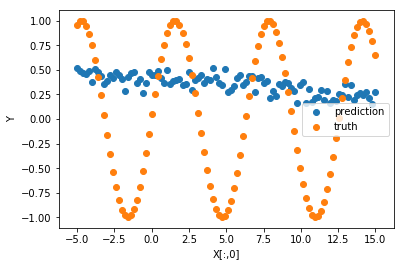

In [19]:
X_test=np.random.uniform(0,10,size=(100,50))
X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()



Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================]5000/5000 [==============================] - 1s 180us/step - loss: 13.9074 - val_loss: 10.6740

Epoch 2/100
5000/5000 [==============================]5000/5000 [==============================] - 0s 69us/step - loss: 8.4991 - val_loss: 6.4252

Epoch 3/100
5000/5000 [==============================]5000/5000 [==============================] - 0s 68us/step - loss: 4.9978 - val_loss: 3.7293

Epoch 4/100
5000/5000 [==============================]5000/5000 [==============================] - 0s 72us/step - loss: 2.8593 - val_loss: 2.1327

Epoch 5/100
5000/5000 [==============================]5000/5000 [==============================] - 0s 69us/step - loss: 1.6398 - val_loss: 1.2628

Epoch 6/100
5000/5000 [==============================]5000/5000 [==============================] - 0s 75us/step - loss: 0.9933 - val_loss: 0.8061

Epoch 7/100
5000/5000 [==============================]5000/5000 [==

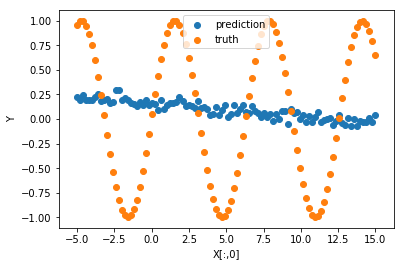

In [34]:
data_dim=12
X=np.random.uniform(0,10,size=(10000,data_dim))
def func(X):
    return np.sin(X[:,0]) #Ignore all other input have the output only depend on the first dimention
Y=func(X)

# All models start out with an input layer

input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
output_layer = tf.keras.layers.Dense(1)(input_layer)
#A keras model is a way of going from one layer to the next
model=tf.keras.models.Model(input_layer,output_layer)
model.compile(loss='mse',optimizer='adam')
model.fit(X,Y,epochs=100,validation_split=0.5,callbacks=[es]) #Have Keras make a test/validation split for us


X_test=np.random.uniform(0,10,size=(100,data_dim))
X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        (None, 12)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 20)                260       
_________________________________________________________________
leaky_re_lu_58 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_87 (Dense)             (None, 20)                420       
_________________________________________________________________
leaky_re_lu_59 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_88 (Dense)             (None, 20)                420       
_________________________________________________________________
leaky_re_lu_60 (LeakyReLU)   (None, 20)                0         
__________

5000/5000 [==============================]5000/5000 [==============================] - 1s 110us/step - loss: 0.0122 - val_loss: 0.0082

Epoch 47/50
5000/5000 [==============================]5000/5000 [==============================] - 1s 104us/step - loss: 0.0090 - val_loss: 0.0069

Epoch 48/50
5000/5000 [==============================]5000/5000 [==============================] - 1s 106us/step - loss: 0.0079 - val_loss: 0.0071

Epoch 49/50
5000/5000 [==============================]5000/5000 [==============================] - 1s 109us/step - loss: 0.0074 - val_loss: 0.0145

Epoch 50/50
5000/5000 [==============================]5000/5000 [==============================] - 1s 109us/step - loss: 0.0077 - val_loss: 0.0064



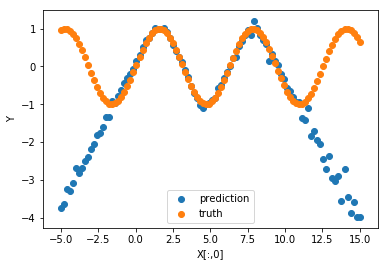

In [36]:
X=np.random.uniform(0,10,size=(10000,data_dim))
def func(X):
    return np.sin(X[:,0]) #Ignore all other input have the output only depend on the first dimention
Y=func(X)

# All models start out with an input layer

input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
###Lets Add another layer and an Activation###
nn = tf.keras.layers.Dense(20)(input_layer)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)


output_layer = tf.keras.layers.Dense(1)(nn)
#A keras model is a way of going from one layer to the next
model=tf.keras.models.Model(input_layer,output_layer)
model.summary()
model.compile(loss='mse',optimizer='adam')
model.fit(X,Y,epochs=50,validation_split=0.5,callbacks=[es]) #Have Keras make a test/validation split for us


X_test=np.random.uniform(0,10,size=(100,data_dim))
X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=model.predict(X_test)

plt.scatter(X_test[:,0],Y_pred,label='prediction')
plt.scatter(X_test[:,0],Y_test,label='truth')
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        (None, 12)                0         
_________________________________________________________________
dense_118 (Dense)            (None, 20)                260       
_________________________________________________________________
leaky_re_lu_82 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 20)                420       
_________________________________________________________________
leaky_re_lu_83 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_120 (Dense)            (None, 20)                420       
_________________________________________________________________
leaky_re_lu_84 (LeakyReLU)   (None, 20)                0         
__________

5000/5000 [==============================]5000/5000 [==============================] - 1s 113us/step - loss: 0.0981 - val_loss: 0.0944

Epoch 47/500
5000/5000 [==============================]5000/5000 [==============================] - 1s 113us/step - loss: 0.0952 - val_loss: 0.0923

Epoch 48/500
5000/5000 [==============================]5000/5000 [==============================] - 1s 114us/step - loss: 0.0863 - val_loss: 0.0896

Epoch 49/500
5000/5000 [==============================]5000/5000 [==============================] - 1s 113us/step - loss: 0.0855 - val_loss: 0.0872

Epoch 50/500
5000/5000 [==============================]5000/5000 [==============================] - 1s 114us/step - loss: 0.0836 - val_loss: 0.0792

Epoch 51/500
5000/5000 [==============================]5000/5000 [==============================] - ETA: 0s - loss: 0.081 - 1s 112us/step - loss: 0.0813 - val_loss: 0.0851

Epoch 52/500
5000/5000 [==============================]5000/5000 [=============================

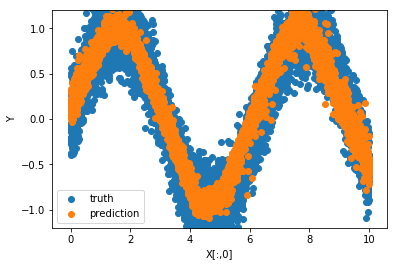

In [44]:
X=np.random.uniform(0,10,size=(10000,data_dim))
def func(X):
    return np.sin(X[:,0])+np.random.normal(size=(len(X)))*.2 #Ignore all other input have the output only depend on the first dimention
Y=func(X)

# All models start out with an input layer

input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
###Lets Add another layer and an Activation###
nn = tf.keras.layers.Dense(20)(input_layer)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)

output_layer = tf.keras.layers.Dense(1)(nn)
#A keras model is a way of going from one layer to the next
model=tf.keras.models.Model(input_layer,output_layer)
model.summary()
model.compile(loss='mse',optimizer='adam')
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

model.fit(X,Y,epochs=500,validation_split=0.5,callbacks=[es]) #Have Keras make a test/validation split for us


X_test=np.random.uniform(0,10,size=(10000,data_dim))
#X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=model.predict(X_test)

plt.scatter(X_test[:,0],Y_test,label='truth')
plt.scatter(X_test[:,0],Y_pred,label='prediction')

plt.ylim((-1.2,1.2))
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        (None, 12)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 20)                260       
_________________________________________________________________
leaky_re_lu_85 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 20)                420       
_________________________________________________________________
leaky_re_lu_86 (LeakyReLU)   (None, 20)                0         
_________________________________________________________________
dense_124 (Dense)            (None, 20)                420       
_________________________________________________________________
leaky_re_lu_87 (LeakyReLU)   (None, 20)                0         
__________

5000/5000 [==============================]5000/5000 [==============================] - 1s 118us/step - loss: 0.1042 - val_loss: 0.0852

Epoch 46/500
5000/5000 [==============================]5000/5000 [==============================] - 1s 117us/step - loss: 0.0978 - val_loss: 0.0786

Epoch 47/500
5000/5000 [==============================]5000/5000 [==============================] - 1s 117us/step - loss: 0.0958 - val_loss: 0.0876

Epoch 48/500
5000/5000 [==============================]5000/5000 [==============================] - 1s 111us/step - loss: 0.0959 - val_loss: 0.0769

Epoch 49/500
5000/5000 [==============================]5000/5000 [==============================] - 1s 124us/step - loss: 0.0944 - val_loss: 0.0724

Epoch 50/500
5000/5000 [==============================]5000/5000 [==============================] - 1s 118us/step - loss: 0.0912 - val_loss: 0.0751

Epoch 51/500
5000/5000 [==============================]5000/5000 [==============================] - 1s 119us/step - los

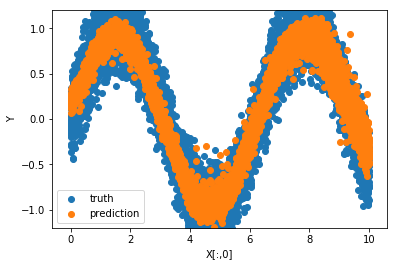

In [45]:
X=np.random.uniform(0,10,size=(10000,data_dim))
def func(X):
    return np.sin(X[:,0])+np.random.normal(size=(len(X)))*.2 #Ignore all other input have the output only depend on the first dimention
Y=func(X)

# All models start out with an input layer

input_layer=tf.keras.layers.Input(shape=(data_dim,)) 
###Lets Add another layer and an Activation###
nn = tf.keras.layers.Dense(20)(input_layer)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)
nn= tf.keras.layers.Dropout(0.1)(nn)

output_layer = tf.keras.layers.Dense(1)(nn)
#A keras model is a way of going from one layer to the next
model=tf.keras.models.Model(input_layer,output_layer)
model.summary()
model.compile(loss='mse',optimizer='adam')
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

model.fit(X,Y,epochs=500,validation_split=0.5,callbacks=[es]) #Have Keras make a test/validation split for us


X_test=np.random.uniform(0,10,size=(10000,data_dim))
#X_test[:,0]=np.linspace(-5,15,100)
Y_test=func(X_test)
Y_pred=model.predict(X_test)

plt.scatter(X_test[:,0],Y_test,label='truth')
plt.scatter(X_test[:,0],Y_pred,label='prediction')

plt.ylim((-1.2,1.2))
plt.xlabel('X[:,0]')
plt.ylabel('Y')
plt.legend()


In [ ]:
# Lets load some input data in the 2-split format
index_from=3
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=index_from)


word_2_index={k:(v+index_from) for k,v in tf.keras.datasets.imdb.get_word_index().items()}
word_2_index['<PAD>']=0
word_2_index['<START>']=1
word_2_index['<UNK>']=2

index_2_word={}

for word in word_2_index:
    index_2_word[ word_2_index[word]]=word


## Text Data

The coding/research part of most machine learning algorithms is how to utilize data in a way an algorthim understands

For this data we assign each word in a sentence a unique integer
include a token (integer for unknown, pad, and start)


In [ ]:
check=['this','is','a','sentence']
print(check, [word_2_index[i] for i in check])

In [ ]:
last_word=np.max(list(word_2_index.values()))

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_train[0])
print(y_train[0])


print(" ".join([index_2_word[i] for i in x_train[0]]))

print('1 = Positive Review','0 = Negative Review ')
print('label',y_train[0])

## Goal

Read the raw the raw text from these movie reviews, and predict wether the review is positive or not
* Need to go from an array (1-D unknown length) to a probability (1 number)
* Need to build a series of layers to make that possible



# Model
Array of Ints -> **Embedding** -> Array of Vectors -> **RNN** -> fixed output -> **Dense** -> Probability

In [48]:
input_layer=tf.keras.layers.Input( (None,))
print(input_layer)

Tensor("input_2:0", shape=(?, ?), dtype=float32)


In [ ]:
nn=tf.keras.layers.Embedding(last_word,100)(input_layer)
nn=tf.keras.layers.LSTM(10)(nn)
nn=tf.keras.layers.Dense(10)(nn)
nn=tf.keras.layers.LeakyReLU()(nn)
nn=tf.keras.layers.Dropout()(nn)
output=tf.keras.layers.Dense(1,activation='sigmoid')(nn)

model=tf.keras.models.Model(input_layer,output)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

In [ ]:
x_train=tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=200, dtype='int32',value=0.0)
x_test=tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=200, dtype='int32',value=0.0)



In [136]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

ValueError: Error when checking input: expected input_25 to have shape (50,) but got array with shape (200,)

In [80]:
def sentence_2_ints(sentence):
    return np.array([[word_2_index[s] for s in sentence.split()]])
    
    

In [97]:
print(model.predict(sentence_2_ints('<START> this movie is the very best i have ever seen') ))

print(model.predict(sentence_2_ints('<START> i have mixed feelings about this movie') ))
print(model.predict(sentence_2_ints('<START> i have mixed feelings about this movie it may like it in the end') ))

print(model.predict(sentence_2_ints('<START> i have never seen a worse film') ))
print(model.predict(sentence_2_ints('<START> hi is this where i google the information') ))

print(model.predict(sentence_2_ints('<START> star trek') ))
print(model.predict(sentence_2_ints('<START> star wars') ))


[[0.8690597]]
[[0.7399085]]
[[0.83663946]]
[[0.2783985]]
[[0.8146159]]
[[0.5867508]]
[[0.5854596]]
